In [73]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
%matplotlib inline
from collections import defaultdict

In [74]:
orders = pd.read_csv('orders.csv')

In [75]:
orders['Title'].head()

0                      KarmetiK Machine Orchestra
1                                          Primer
2             Independent Lens: Between the Folds
3    Safer's Insecticidal Soap: 500mL Concentrate
4                           The French Connection
Name: Title, dtype: object

In [76]:
months = orders['Order Date']

In [77]:
months.head()

0    01/22/11
1    02/19/11
2    03/23/11
3    06/10/11
4    06/22/11
Name: Order Date, dtype: object

In [78]:
parse_month = lambda x: float(x[0:2])

In [79]:
months = months.apply(parse_month);

In [80]:
months.head()

0    1.0
1    2.0
2    3.0
3    6.0
4    6.0
Name: Order Date, dtype: float64

In [81]:
months.value_counts()

12.0    28
9.0     24
1.0     24
2.0     22
10.0    21
7.0     20
4.0     19
11.0    18
6.0     17
8.0      8
5.0      8
3.0      8
Name: Order Date, dtype: int64

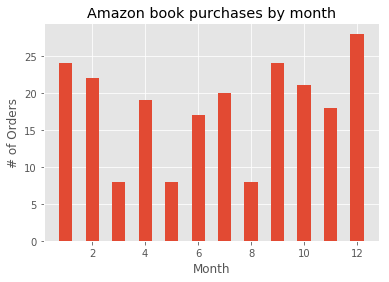

In [82]:
# risky! and not scalable (scroll down, I found a better way to do this)
month_dict = {12:28, 9:24, 1:24, 2:22, 10:21, 7:20, 4:19, 11:18, 6:17, 8:8, 5:8, 3:8}
x = month_dict.keys()
y = month_dict.values()
ax = plt.subplot()
barWidth=0.5
ax.bar(month_dict.keys(), month_dict.values(), width=barWidth, align='center')
ax.set_title('Amazon book purchases by month')
ax.set_xlabel('Month')
ax.set_ylabel('# of Orders')

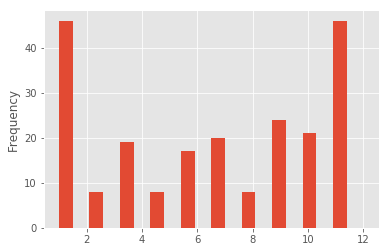

In [83]:
months.plot(x = months, kind = 'hist', width=0.5) # hmmm

In [84]:
years = orders['Order Date']

In [85]:
parse_years = lambda x: float(x[6:8])

In [86]:
years = years.apply(parse_years)

In [87]:
years.head()

0    11.0
1    11.0
2    11.0
3    11.0
4    11.0
Name: Order Date, dtype: float64

In [88]:
# order about 31 items a year
years.value_counts().mean()

31.0

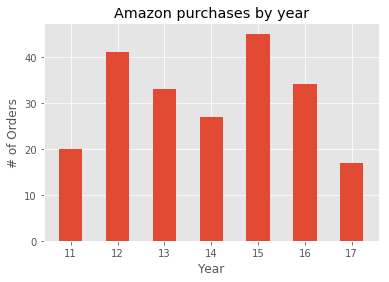

In [89]:
years_dict = {15:45, 12:41, 16:34, 13:33, 14:27, 11:20, 17:17}
ax = plt.subplot()
barWidth=0.5
ax.bar(years_dict.keys(), years_dict.values(), width=barWidth, align='center')
ax.set_title('Amazon purchases by year')
ax.set_xlabel('Year')
ax.set_ylabel('# of Orders')

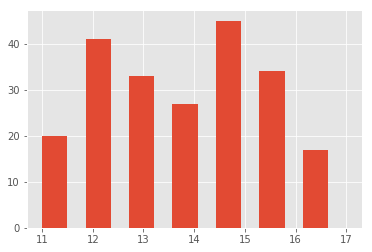

In [90]:
# why is this a mess?!
years.hist(bins = 7, width = 0.5)

In [91]:
parse_amounts = lambda x : float(x[1:5])

In [92]:
amounts = orders['Item Total'].apply(parse_amounts)

In [93]:
amounts.sum()

4864.2199999999993

In [94]:
amounts.mean()

22.415760368663591

In [95]:
order_counts = {}
for j in orders['Category']:
    if j in order_counts.keys():
        order_counts[j] += 1
    else:
        order_counts[j] = 1

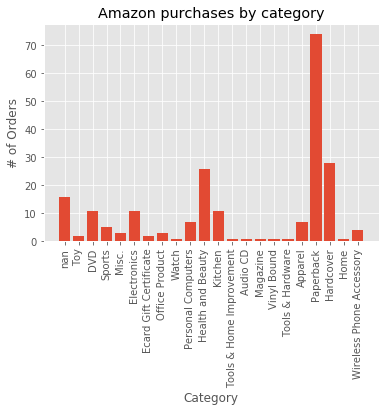

In [96]:
x = range(1,len(order_counts.keys())+1)
plt.xticks(x, order_counts.keys(),rotation='vertical')
plt.bar(x, order_counts.values(), align='center')
barWidth=0.5
plt.title('Amazon purchases by category')
plt.xlabel('Category')
plt.ylabel('# of Orders')

In [97]:
paperbacks = orders.loc[orders['Category']=='Paperback'];

In [98]:
hardcovers = orders.loc[orders['Category']=='Hardcover'];

In [99]:
paperbacks['Title'].head()

7     Introduction to Numerical Analysis: Second Edi...
8     Fluid Mechanics (Dover Classics of Science & M...
10    Guesstimation: Solving the World's Problems on...
11    Calculus of Variations (Dover Books on Mathema...
12    American Political Cartoons, 1754-2010: The Ev...
Name: Title, dtype: object

In [100]:
hardcovers['Title'].head()

39    Introduction to Probability Models, Tenth Edition
64    Introduction to Perturbation Methods (Texts in...
85    Functions of One Complex Variable (Graduate Te...
87          Die Empty: Unleash Your Best Work Every Day
94    Fast Multipole Boundary Element Method: Theory...
Name: Title, dtype: object

In [101]:
hc_prices = hardcovers['Item Total'].apply(parse_amounts)

In [102]:
pb_prices = paperbacks['Item Total'].apply(parse_amounts)

In [103]:
hc_prices.sum()

985.75

In [104]:
pb_prices.sum()

1401.48

In [105]:
hc_prices.max()

188.0

In [106]:
pb_prices.max()

92.200000000000003

In [107]:
hc_prices[hc_prices==hc_prices.max()]

182    188.0
Name: Item Total, dtype: float64

In [108]:
# Ah! TAOCP. Worth it
orders[orders.index==182]['Title']

182    The Art of Computer Programming, Volumes 1-4A ...
Name: Title, dtype: object

In [109]:
pb_prices[pb_prices==pb_prices.max()]

188    92.2
Name: Item Total, dtype: float64

In [110]:
# figures...
orders[orders.index==188]['Title']

188    Deployable Real-time Traffic Routing Under Inf...
Name: Title, dtype: object

In [111]:
books = pd.concat([hardcovers, paperbacks])
books['Title'].head()

39    Introduction to Probability Models, Tenth Edition
64    Introduction to Perturbation Methods (Texts in...
85    Functions of One Complex Variable (Graduate Te...
87          Die Empty: Unleash Your Best Work Every Day
94    Fast Multipole Boundary Element Method: Theory...
Name: Title, dtype: object

In [112]:
# let's figure out the titles of what I read
titles = defaultdict(int)
for j in books['Title']:
    for k in j.split(' '):
        if k.lower() in titles.keys():
            titles[k.lower()] += 1
        else:
            titles[k.lower()] = 1

In [113]:
for w in sorted(titles, key=titles.get, reverse=True):
      print w, titles[w]

of 34
and 32
in 32
the 32
to 29
a 22
(dover 15
mathematics) 15
edition 13
on 13
your 11
books 10
with 10
applications 7
series 7
introduction 7
& 6
how 6
data 6
statistical 6
theory 6
applied 6
methods 6
programming 5
probability 5
computer 5
guide 5
numerical 5
science) 5
research 4
second 4
texts 4
effective 4
art 4
for 4
programming, 3
thrift 3
use 3
from 3
work 3
control 3
outline 3
operations 3
(springer 3
editions) 3
ways 3
life 3
optimization 3
analysis 3
c++, 3
mathematical 3
at 3
functions 3
mathematics 3
you 3
go 2
shaving 2
inference, 2
(texts 2
models, 2
linear 2
equations 2
change 2
foundations 2
statistics) 2
everyday 2
habits 2
network 2
standard 2
perturbation 2
mining, 2
learning: 2
american 2
think 2
one 2
management 2
that 2
1: 2
modern 2
say 2
any 2
- 2
calculus 2
who 2
cover 2
random 2
new 2
differential 2
improve 2
(cambridge 2
2nd 2
bayesian 2
things 2
python 2
complex 2
happiness 2
thinking 2
book 2
back 2
specific 2
be 2
(graduate 2
analysis: 2
fast 2
complete 

In [114]:
# so the perfect book for me would be "The Dover Mathematics Edition: Books"
# But seriously, it looks like something from dover on introductions or applications of math, with a seeming bias
# to statistics, probability, and programming

In [115]:
# when do I buy books the most?
book_months = {}
book_years = {}
book_year_frame = books['Order Date'].apply(parse_years)
book_month_frame = books['Order Date'].apply(parse_month)

In [116]:
book_years = book_year_frame.value_counts().to_dict()

In [117]:
book_months = book_month_frame.value_counts().to_dict()

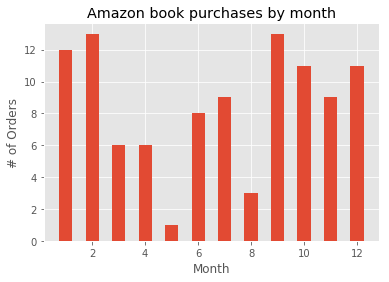

In [118]:
ax = plt.subplot()
barWidth=0.5
ax.bar(book_months.keys(), book_months.values(), width=barWidth, align='center')
ax.set_title('Amazon book purchases by month')
ax.set_xlabel('Month')
ax.set_ylabel('# of Orders')

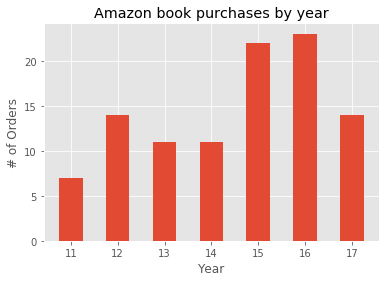

In [119]:
ax = plt.subplot()
barWidth=0.5
ax.bar(book_years.keys(), book_years.values(), width=barWidth, align='center')
ax.set_title('Amazon book purchases by year')
ax.set_xlabel('Year')
ax.set_ylabel('# of Orders')